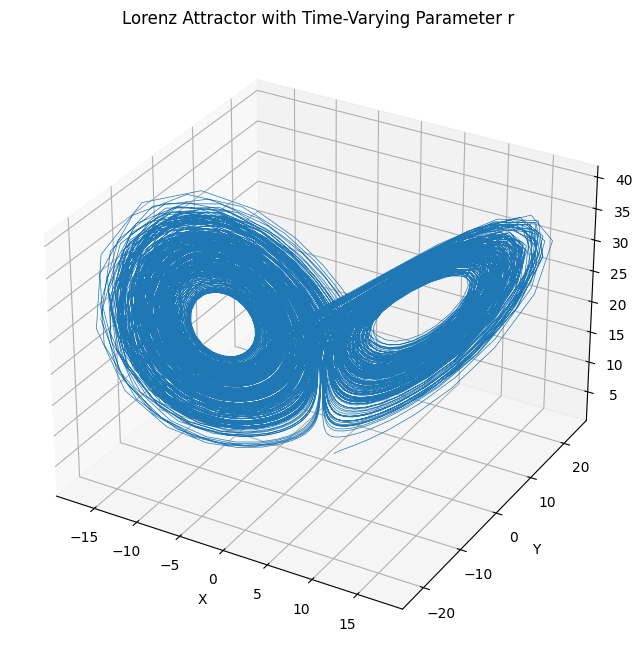

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the Lorenz system parameters
sigma = 10
b = 8/3
omega = 0.01  # Small compared to typical orbital frequencies

# Define the Lorenz system with time-varying r
def lorenz_system(t, state):
    x, y, z = state
    r = 24.4 + np.sin(omega * t)
    dxdt = sigma * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - b * z
    return [dxdt, dydt, dzdt]

# Initial condition (chosen arbitrarily)
initial_state = [1.0, 1.0, 1.0]

# Time span for the integration
t_span = [0, 350]

# Solve the differential equations
solution = solve_ivp(lorenz_system, t_span, initial_state, t_eval=np.linspace(t_span[0], t_span[1], 10000))

# Plot the solution in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution.y[0], solution.y[1], solution.y[2], lw=0.5)
ax.set_title("Lorenz Attractor with Time-Varying Parameter r")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()


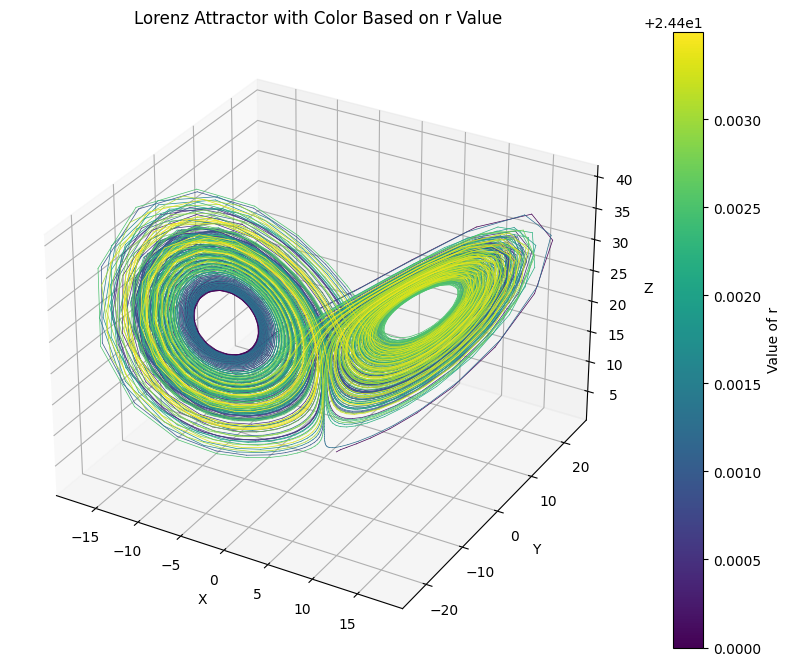

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the Lorenz system parameters
sigma = 10
b = 8/3
omega = 1e-5  # Small compared to typical orbital frequencies

# Define the Lorenz system with time-varying r
def lorenz_system(t, state):
    x, y, z = state
    r = 24.4 + np.sin(omega * t)
    dxdt = sigma * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - b * z
    return [dxdt, dydt, dzdt]

# Initial condition (chosen arbitrarily)
initial_state = [1.0, 1.0, 1.0]

# Time span for the integration
t_span = [0, 350]

# Solve the differential equations
solution = solve_ivp(lorenz_system, t_span, initial_state, t_eval=np.linspace(t_span[0], t_span[1], 10000))


# Recompute with color mapping based on the value of r


# New function to calculate r for color mapping
def calculate_r(t):
    return 24.4 + np.sin(omega * t)

# Precompute r values for color
r_values = calculate_r(solution.t)

# Normalize r values for color mapping
r_normalized = (r_values - np.min(r_values)) / (np.max(r_values) - np.min(r_values))

# Create a colormap
cmap = plt.get_cmap('viridis')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot with color based on r value
for i in range(len(solution.t) - 1):
    ax.plot(solution.y[0, i:i+2], solution.y[1, i:i+2], solution.y[2, i:i+2], color=cmap(r_normalized[i]), lw=0.5)

ax.set_title("Lorenz Attractor with Color Based on r Value")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(r_values), vmax=np.max(r_values)))
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Value of r')

plt.show()


MovieWriter stderr:
convert: unexpected end-of-file '-': No such file or directory @ error/rgb.c/ReadRGBImage/249.
convert: no images defined `./lorenz_attractor_evolution_no_overlay.gif' @ error/convert.c/ConvertImageCommand/3342.



CalledProcessError: Command '['convert', '-size', '1000x700', '-depth', '8', '-delay', '10.0', '-loop', '0', 'rgba:-', '-layers', 'OptimizePlus', './lorenz_attractor_evolution_no_overlay.gif']' returned non-zero exit status 1.

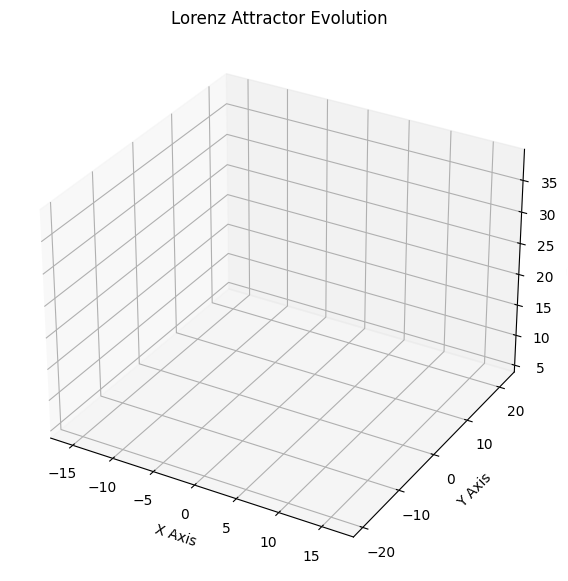

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Lorenz system parameters
sigma = 10
b = 8/3
omega = 0.01

# Lorenz system equations
def lorenz_system(t, state):
    x, y, z = state
    r = 24.4 + np.sin(omega * t)
    dxdt = sigma * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - b * z
    return [dxdt, dydt, dzdt]

# Initial conditions and time span
initial_state = [1.0, 1.0, 1.0]
t_span = [0, 350]
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve Lorenz system
solution = solve_ivp(lorenz_system, t_span, initial_state, t_eval=t_eval)

# Setup for the animation
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 7))

# Update function for the animation
def update(frame):
    ax.clear()
    start_idx = max(0, frame - (len(t_eval) // 10))  # Start index for the current window
    ax.plot(solution.y[0, start_idx:frame], solution.y[1, start_idx:frame], solution.y[2, start_idx:frame], lw=0.5)
    ax.set_title("Lorenz Attractor Evolution")
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")

# Total frames for the animation
total_frames = len(t_eval)

# Create the animation
ani = FuncAnimation(fig, update, frames=range(total_frames), blit=False)

# Save the animation as GIF without overlaying frames
ani.save('./lorenz_attractor_evolution_no_overlay.gif', writer='imagemagick', fps=10)



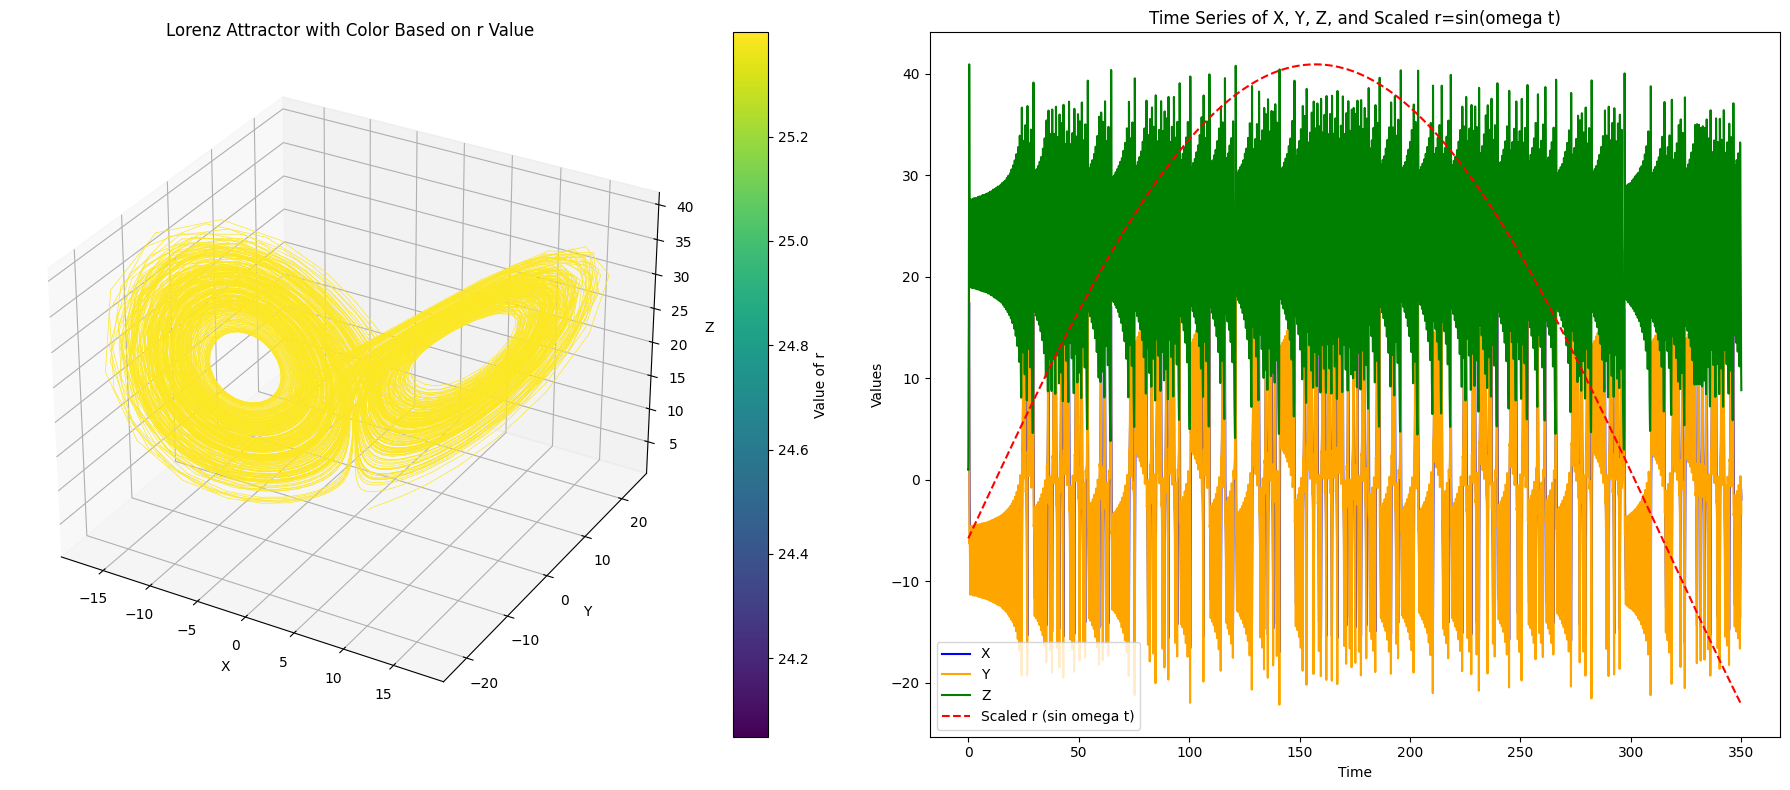

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the Lorenz system parameters
sigma = 10
b = 8/3
omega = 1e-2  # Small compared to typical orbital frequencies

# Define the Lorenz system with time-varying r
def lorenz_system(t, state):
    x, y, z = state
    r = 24.4 + np.sin(omega * t)
    dxdt = sigma * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - b * z
    return [dxdt, dydt, dzdt]

# Initial condition (chosen arbitrarily)
initial_state = [1.0, 1.0, 1.0]

# Time span for the integration
t_span = [0, 350]

# Solve the differential equations
solution = solve_ivp(lorenz_system, t_span, initial_state, t_eval=np.linspace(t_span[0], t_span[1], 10000))

# Calculate r for color mapping and normalization
r_values = 24.4 + np.sin(omega * solution.t)

# Normalize r to the same scale as x, y, and z
r_scaled = (r_values - np.min(r_values)) * (np.max(solution.y) - np.min(solution.y)) / (np.max(r_values) - np.min(r_values)) + np.min(solution.y)

# Create a colormap
cmap = plt.get_cmap('viridis')

# Setup figure for both Lorenz attractor and time series
fig = plt.figure(figsize=(18, 8))

# Plot for the Lorenz attractor
ax1 = fig.add_subplot(121, projection='3d')
for i in range(len(solution.t) - 1):
    ax1.plot(solution.y[0, i:i+2], solution.y[1, i:i+2], solution.y[2, i:i+2], color=cmap(r_values[i]), lw=0.5)
ax1.set_title("Lorenz Attractor with Color Based on r Value")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")

# Colorbar for the Lorenz attractor plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(r_values), vmax=np.max(r_values)))
sm.set_array([])
fig.colorbar(sm, ax=ax1, label='Value of r')

# Plot for the time series
ax2 = fig.add_subplot(122)
ax2.plot(solution.t, solution.y[0], label='X', color='blue')
ax2.plot(solution.t, solution.y[1], label='Y', color='orange')
ax2.plot(solution.t, solution.y[2], label='Z', color='green')
ax2.plot(solution.t, r_scaled, label='Scaled r (sin omega t)', color='red', linestyle='--')
ax2.set_title("Time Series of X, Y, Z, and Scaled r=sin(omega t)")
ax2.set_xlabel("Time")
ax2.set_ylabel("Values")
ax2.legend()

plt.tight_layout()
plt.show()
